In [46]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
import os 
content_dir = os.getcwd() + '/test_content/'
style_dir = os.getcwd() + '/test_style/'
model_dir = os.getcwd() + '/Models/'

import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

import torchvision
from torchvision import transforms

from PIL import Image
from collections import OrderedDict
from time import time

In [47]:
# class VGG(nn.Module):
#     def __init__(self, pool='max'):
#         super(VGG, self).__init__()
#         # vgg modules
#         self.features = nn.Sequential(
#             nn.Conv2d(3, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(64, 64, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(64, 128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(128, 128, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(128, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(256, 256, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(256, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.Conv2d(512, 512, kernel_size=3, padding=1),
#             nn.ReLU(),
#             nn.MaxPool2d(kernel_size=2, stride=2)
#         )
#         self.classifier = nn.Sequential(
#             nn.Linear(512 * 7 * 7, 4096),
#             nn.ReLU(),
#             nn.Dropout(),
#             nn.Linear(4096, 4096),
#             nn.ReLU(),
#             nn.Dropout(),
#             nn.Linear(4096, 1000)
#         )

#     def forward(self, x, out_keys):
#         out = {}
#         out['r11'] = self.features[1](self.features[0](x))
#         out['r12'] = self.features[3](self.features[2](out['r11']))
#         out['p1'] = self.features[4](out['r12'])
#         out['r21'] = self.features[6](self.features[5](out['p1']))
#         out['r22'] = self.features[8](self.features[7](out['r21']))
#         out['p2'] = self.features[9](out['r22'])
#         out['r31'] = self.features[11](self.features[10](out['p2']))
#         out['r32'] = self.features[13](self.features[12](out['r31']))
#         out['r33'] = self.features[15](self.features[14](out['r32']))
#         out['r34'] = self.features[17](self.features[16](out['r33']))
#         out['p3'] = self.features[18](out['r34'])
#         out['r41'] = self.features[20](self.features[19](out['p3']))
#         out['r42'] = self.features[22](self.features[21](out['r41']))
#         out['r43'] = self.features[24](self.features[23](out['r42']))
#         out['r44'] = self.features[26](self.features[25](out['r43']))
#         out['p4'] = self.features[27](out['r44'])
#         out['r51'] = self.features[28](self.features[27](out['p4']))
#         out['r52'] = self.features[30](self.features[29](out['r51']))
#         out['r53'] = self.features[32](self.features[31](out['r52']))
#         out['r54'] = self.features[34](self.features[33](out['r53']))
#         out['p5'] = self.features[35](out['r54'])
#         return [out[key] for key in out_keys]
class VGG(nn.Module):
    def __init__(self, pool='max'):
        super(VGG, self).__init__()
        #vgg modules
        self.conv1_1 = nn.Conv2d(3, 64, kernel_size=3, padding=1)
        self.conv1_2 = nn.Conv2d(64, 64, kernel_size=3, padding=1)
        self.conv2_1 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.conv2_2 = nn.Conv2d(128, 128, kernel_size=3, padding=1)
        self.conv3_1 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.conv3_2 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_3 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv3_4 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
        self.conv4_1 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.conv4_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv4_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_1 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_2 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_3 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        self.conv5_4 = nn.Conv2d(512, 512, kernel_size=3, padding=1)
        if pool == 'max':
            self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.MaxPool2d(kernel_size=2, stride=2)
        elif pool == 'avg':
            self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool3 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool4 = nn.AvgPool2d(kernel_size=2, stride=2)
            self.pool5 = nn.AvgPool2d(kernel_size=2, stride=2)
            
    def forward(self, x, out_keys):
        out = {}
        out['r11'] = F.relu(self.conv1_1(x))
        out['r12'] = F.relu(self.conv1_2(out['r11']))
        out['p1'] = self.pool1(out['r12'])
        out['r21'] = F.relu(self.conv2_1(out['p1']))
        out['r22'] = F.relu(self.conv2_2(out['r21']))
        out['p2'] = self.pool2(out['r22'])
        out['r31'] = F.relu(self.conv3_1(out['p2']))
        out['r32'] = F.relu(self.conv3_2(out['r31']))
        out['r33'] = F.relu(self.conv3_3(out['r32']))
        out['r34'] = F.relu(self.conv3_4(out['r33']))
        out['p3'] = self.pool3(out['r34'])
        out['r41'] = F.relu(self.conv4_1(out['p3']))
        out['r42'] = F.relu(self.conv4_2(out['r41']))
        out['r43'] = F.relu(self.conv4_3(out['r42']))
        out['r44'] = F.relu(self.conv4_4(out['r43']))
        out['p4'] = self.pool4(out['r44'])
        out['r51'] = F.relu(self.conv5_1(out['p4']))
        out['r52'] = F.relu(self.conv5_2(out['r51']))
        out['r53'] = F.relu(self.conv5_3(out['r52']))
        out['r54'] = F.relu(self.conv5_4(out['r53']))
        out['p5'] = self.pool5(out['r54'])
        return [out[key] for key in out_keys]

In [48]:
# gram matrix and loss
class GramMatrix(nn.Module):
    def forward(self, input):
        b,c,h,w = input.size()
        F = input.view(b, c, h*w)
        G = torch.bmm(F, F.transpose(1,2)) 
        G.div_(h*w)
        return G

class GramMSELoss(nn.Module):
    def forward(self, input, target):
        out = nn.MSELoss()(GramMatrix()(input), target)
        return(out)

In [49]:
class LaplacianNetwork(nn.Module):
    def __init__(self, in_channels=3):
        super(LaplacianNetwork, self).__init__()
        # pooling layer
        self.pooling_layer = nn.AvgPool2d(kernel_size=4, stride=4)
        # laplacian filter
        laplacian_filter = torch.Tensor([[0, -1, 0],
                                         [-1, 4, -1],
                                         [0, -1, 0]])
        laplacian_filter = laplacian_filter.view(1, 1, 3, 3).repeat(1, in_channels, 1, 1)
        self.laplacian_filter = nn.Conv2d(in_channels, 1, kernel_size=3, padding=1, bias=False)
        self.laplacian_filter.weight = nn.Parameter(laplacian_filter)

    def forward(self, x):
        x = self.pooling_layer(x)
        x = self.laplacian_filter(x)
        return x


In [50]:
# pre and post processing for images
img_size = 700 
prep = transforms.Compose([transforms.Resize(img_size),
                           transforms.ToTensor(),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to BGR
                           transforms.Normalize(mean=[0.40760392, 0.45795686, 0.48501961], #subtract imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x.mul_(255)),
                          ])
postpa = transforms.Compose([transforms.Lambda(lambda x: x.mul_(1./255)),
                           transforms.Normalize(mean=[-0.40760392, -0.45795686, -0.48501961], #add imagenet mean
                                                std=[1,1,1]),
                           transforms.Lambda(lambda x: x[torch.LongTensor([2,1,0])]), #turn to RGB
                           ])
postpb = transforms.Compose([transforms.ToPILImage()])
def postp(tensor): # to clip results in the range [0,1]
    t = postpa(tensor)
    t[t>1] = 1    
    t[t<0] = 0
    img = postpb(t)
    return img

In [51]:
#get network
vgg = VGG()
vgg.load_state_dict(torch.load(model_dir + 'vgg_conv_2014.pth'))
#from torchvision import transforms, models
#vgg = models.vgg19(pretrained=True)
for param in vgg.parameters():
    param.requires_grad = False
if torch.cuda.is_available():
    vgg.cuda()

lap = LaplacianNetwork()
for param in lap.parameters():
    param.requires_grad = False
if torch.cuda.is_available():
    lap.cuda()

['anni.jpg']
['pica.jpg']


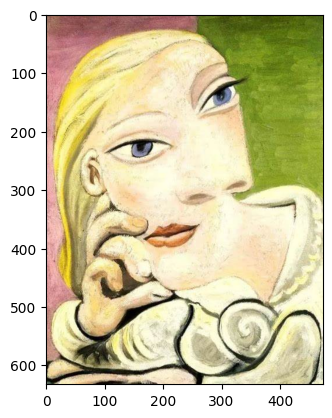

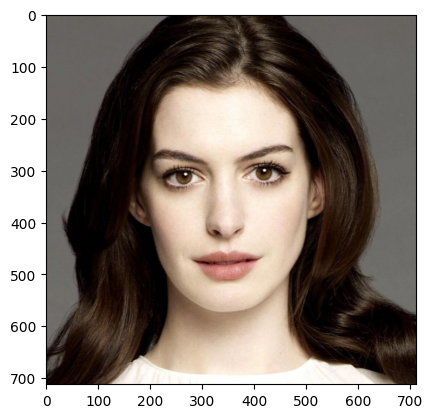

Iteration: 50, loss: 14500569.000000
Iteration: 100, loss: 6158508.500000
Iteration: 150, loss: 3746505.500000
Iteration: 200, loss: 2537596.750000
Iteration: 250, loss: 1753189.750000
Iteration: 300, loss: 1216802.875000
Iteration: 350, loss: 895491.312500
Iteration: 400, loss: 712305.625000
Iteration: 450, loss: 604912.500000
Iteration: 500, loss: 532782.750000
Iteration: 550, loss: 481283.312500
Iteration: 600, loss: 440449.968750
Iteration: 650, loss: 408233.312500
Iteration: 700, loss: 383078.000000
Iteration: 750, loss: 363135.687500
Iteration: 800, loss: 347644.312500
Iteration: 850, loss: 334668.906250
Iteration: 900, loss: 323691.656250
Iteration: 950, loss: 314479.875000
Iteration: 1000, loss: 306555.687500
Iteration: 1050, loss: 299424.468750
Iteration: 1100, loss: 293173.250000
Iteration: 1150, loss: 287643.062500
Iteration: 1200, loss: 282632.437500
Iteration: 1250, loss: 278368.875000
Iteration: 1300, loss: 274106.656250
Iteration: 1350, loss: 270420.156250
Iteration: 140

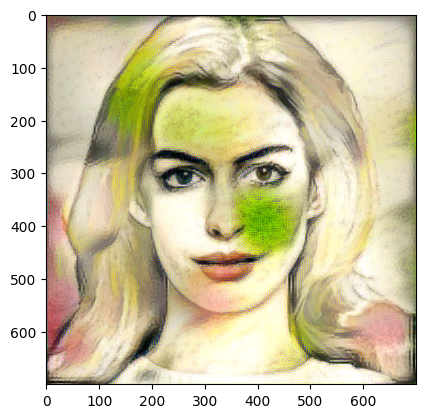

Time elapsed: 260.873456


<Figure size 1000x1000 with 0 Axes>

In [52]:
#load images, ordered as [style_image, content_image]
img_dirs = [style_dir,content_dir]
content_names = [f for f in os.listdir(content_dir) if os.path.isfile(os.path.join(content_dir, f))]
style_names = [f for f in os.listdir(style_dir) if os.path.isfile(os.path.join(style_dir, f))]
print(content_names)
print(style_names)
opt_imgs=[]
for cn in content_names:
    for sn in style_names:
        start = time()
        img_names = [sn,cn]
        imgs = [Image.open(img_dirs[i] + name) for i,name in enumerate(img_names)]
        # # resize height to img_size and keep aspect ratio
        # imgs = [img.resize((int(image.size[0]*img_size/image.size[1]),img_size)) for image in imgs]
        imgs_torch = [prep(img) for img in imgs]
        if torch.cuda.is_available():
            imgs_torch = [Variable(img.unsqueeze(0).cuda()) for img in imgs_torch]
        else:
            imgs_torch = [Variable(img.unsqueeze(0)) for img in imgs_torch]
        style_image, content_image = imgs_torch

        opt_img = Variable(torch.randn(content_image.size()).type_as(content_image.data), requires_grad=True) #random init
        # opt_img = Variable(content_image.data.clone(), requires_grad=True)
        for img in imgs:
            plt.imshow(img);plt.show()
        #define layers, loss functions, weights and compute optimization targets
        style_layers = ['r11','r21','r31','r41', 'r51'] 
        content_layers = ['r42']
        loss_layers = style_layers + content_layers
        loss_fns = [GramMSELoss()] * len(style_layers) + [nn.MSELoss()] * len(content_layers)
        if torch.cuda.is_available():
            loss_fns = [loss_fn.cuda() for loss_fn in loss_fns]
    
        #these are good weights settings:
        style_weights = [1e3/n**2 for n in [64,128,256,512,512]]
        content_weights = [1e0]
        weights = style_weights + content_weights
        
        #compute optimization targets
        style_targets = [GramMatrix()(A).detach() for A in vgg(style_image, style_layers)]
        content_targets = [A.detach() for A in vgg(content_image, content_layers)]
        targets = style_targets + content_targets

        lap_target = lap(content_image)

        #run style transfer
        max_iter = 2000
        show_iter = 50
        optimizer = optim.LBFGS([opt_img],lr=1)
        optimizer = optimizer
        n_iter=[0]

        while n_iter[0] <= max_iter:
            torch.cuda.empty_cache()
            def closure():

                optimizer.zero_grad()
                out = vgg(opt_img, loss_layers)
                layer_losses = [weights[a] * loss_fns[a](A, targets[a]) for a,A in enumerate(out)]
                loss_lap = nn.MSELoss()(lap(opt_img),lap_target)
                loss = torch.sum(torch.stack(layer_losses)) + loss_lap*100 
                loss.backward()
                n_iter[0]+=1
                if n_iter[0]%show_iter == (show_iter-1):
                    print('Iteration: %d, loss: %f'%(n_iter[0]+1, loss.item()))
                return loss
            optimizer.step(closure)
            if n_iter[0] >= max_iter:
                break
        #display result
        out_img = postp(opt_img.data[0].cpu().squeeze())
        opt_imgs.append(opt_img)
        plt.imshow(out_img)
        plt.show()
        plt.gcf().set_size_inches(10,10)
        print('Time elapsed: %f'%(time()-start))

In [53]:
out_img1 = [postp(opt_img1.data[0].cpu().squeeze())  for opt_img1 in opt_imgs]

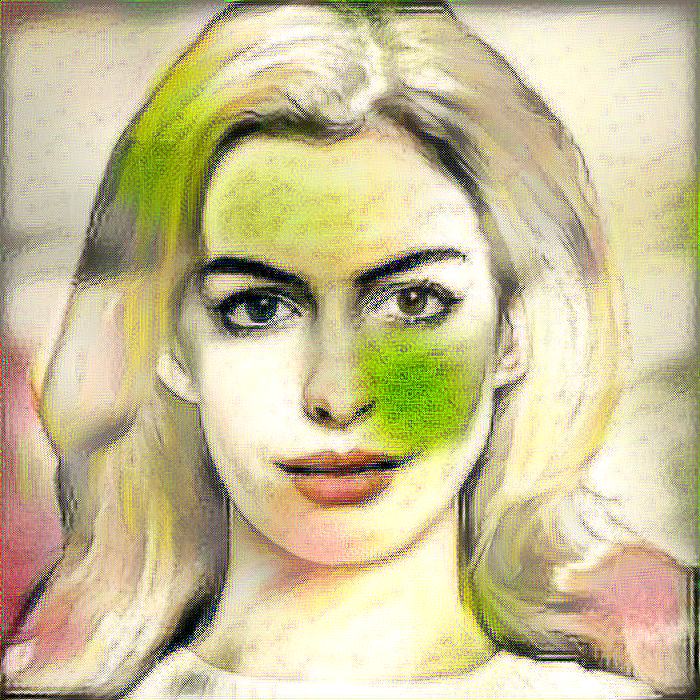

In [56]:
out_img1[0]

In [55]:
out_img1[1]

IndexError: list index out of range

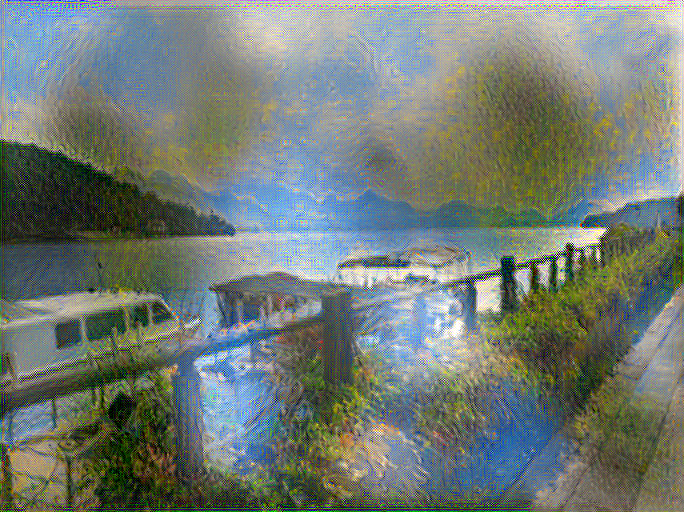

In [ ]:
out_img1[2]

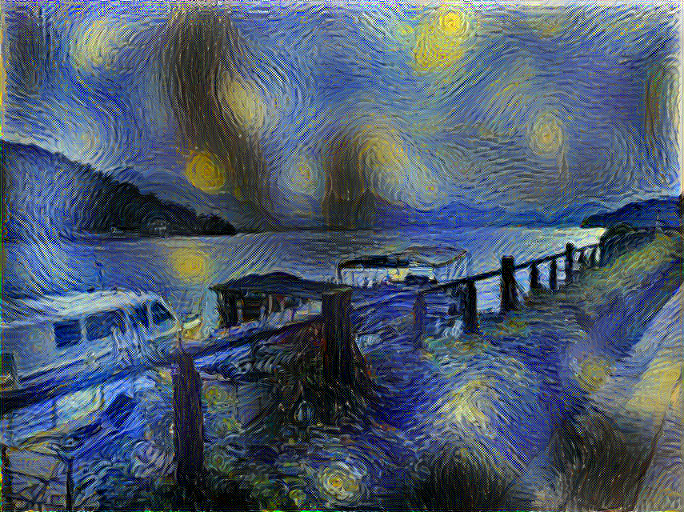

In [ ]:
out_img1[3]

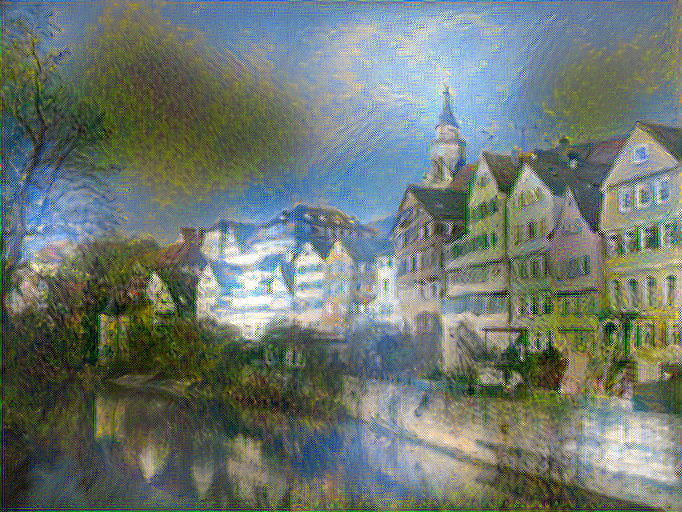

In [ ]:
out_img1[4]

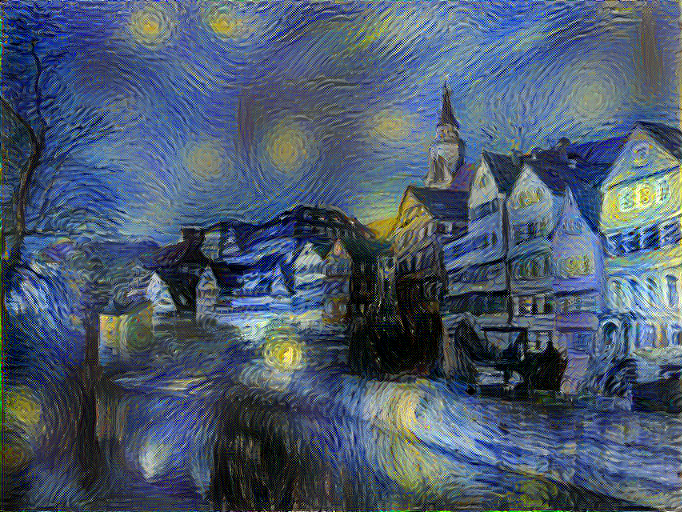

In [ ]:
out_img1[5]